In [113]:
%matplotlib inline
import matplotlib.pyplot as plt
import random
import time

In [50]:
N = 60
eps = 1.0

for i in range(N):
    eps /= 2
    one_Plus_eps = 1.0 + eps
#     if i%10==0:
    print(i, ': eps = ',eps, ', one_Plus_eps = ', one_Plus_eps)

0 : eps =  0.5 , one_Plus_eps =  1.5
1 : eps =  0.25 , one_Plus_eps =  1.25
2 : eps =  0.125 , one_Plus_eps =  1.125
3 : eps =  0.0625 , one_Plus_eps =  1.0625
4 : eps =  0.03125 , one_Plus_eps =  1.03125
5 : eps =  0.015625 , one_Plus_eps =  1.015625
6 : eps =  0.0078125 , one_Plus_eps =  1.0078125
7 : eps =  0.00390625 , one_Plus_eps =  1.00390625
8 : eps =  0.001953125 , one_Plus_eps =  1.001953125
9 : eps =  0.0009765625 , one_Plus_eps =  1.0009765625
10 : eps =  0.00048828125 , one_Plus_eps =  1.00048828125
11 : eps =  0.000244140625 , one_Plus_eps =  1.000244140625
12 : eps =  0.0001220703125 , one_Plus_eps =  1.0001220703125
13 : eps =  6.103515625e-05 , one_Plus_eps =  1.00006103515625
14 : eps =  3.0517578125e-05 , one_Plus_eps =  1.000030517578125
15 : eps =  1.52587890625e-05 , one_Plus_eps =  1.0000152587890625
16 : eps =  7.62939453125e-06 , one_Plus_eps =  1.0000076293945312
17 : eps =  3.814697265625e-06 , one_Plus_eps =  1.0000038146972656
18 : eps =  1.9073486328125e-0

## 乱数

### 線形合同法
失敗例

In [51]:
randoms = []
N = 260
a = 57; c = 1; M =256; r = 10
for i in range(N):
    r = (a*r + c)%M
    if r in randoms:
        print(i)
        
    randoms.append(r)
print(randoms)

256
257
258
259
[59, 36, 5, 30, 175, 248, 57, 178, 163, 76, 237, 198, 23, 32, 33, 90, 11, 116, 213, 110, 127, 72, 9, 2, 115, 156, 189, 22, 231, 112, 241, 170, 219, 196, 165, 190, 79, 152, 217, 82, 67, 236, 141, 102, 183, 192, 193, 250, 171, 20, 117, 14, 31, 232, 169, 162, 19, 60, 93, 182, 135, 16, 145, 74, 123, 100, 69, 94, 239, 56, 121, 242, 227, 140, 45, 6, 87, 96, 97, 154, 75, 180, 21, 174, 191, 136, 73, 66, 179, 220, 253, 86, 39, 176, 49, 234, 27, 4, 229, 254, 143, 216, 25, 146, 131, 44, 205, 166, 247, 0, 1, 58, 235, 84, 181, 78, 95, 40, 233, 226, 83, 124, 157, 246, 199, 80, 209, 138, 187, 164, 133, 158, 47, 120, 185, 50, 35, 204, 109, 70, 151, 160, 161, 218, 139, 244, 85, 238, 255, 200, 137, 130, 243, 28, 61, 150, 103, 240, 113, 42, 91, 68, 37, 62, 207, 24, 89, 210, 195, 108, 13, 230, 55, 64, 65, 122, 43, 148, 245, 142, 159, 104, 41, 34, 147, 188, 221, 54, 7, 144, 17, 202, 251, 228, 197, 222, 111, 184, 249, 114, 99, 12, 173, 134, 215, 224, 225, 26, 203, 52, 149, 46, 63, 8, 201, 19

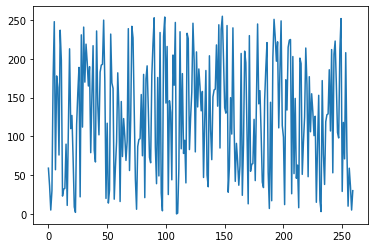

In [52]:
_ = plt.plot(randoms)

続いて発生する２つの組みをプロット

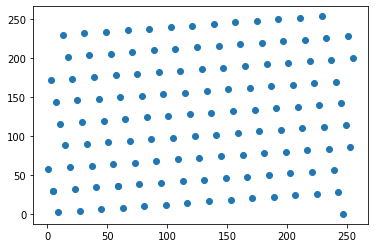

In [53]:
x = []
y = []
for i in range(len(randoms)//2):
    x.append(randoms[2*i])
    y.append(randoms[2*i+1])
_ = plt.scatter(x,y)

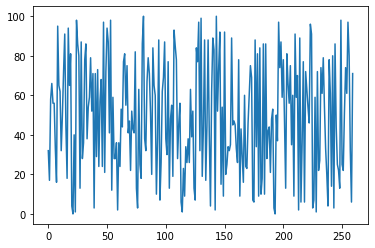

In [54]:
true_randoms = []
for i in range(260):
    true_randoms.append(random.randint(0,100))
_ = plt.plot(true_randoms)

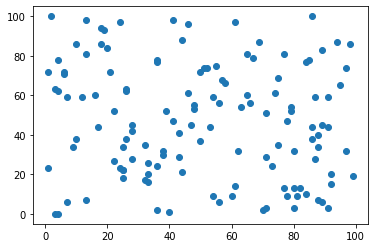

In [55]:
x_ = []
y_ = []
for i in range(len(true_randoms)//2):
    x_.append(true_randoms[2*i])
    y_.append(true_randoms[2*i+1])
_ = plt.scatter(x_,y_)

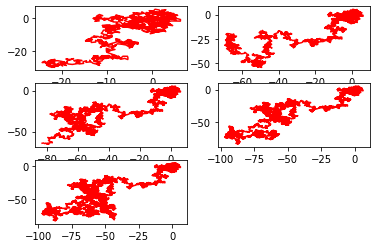

In [63]:
fig = plt.figure()
op = []
K = 5
N = 1000
x_ = []; y_ = []
x = 0.; y= 0.
for k in range(K):
    random.seed(k)
    for i in range(N):
        x_.append(x); y_.append(y)
        dx = (random.random() - 0.5)*2; dy = (random.random() - 0.5)*2
        l = (dx**2 + dy**2)**(0.5)
        dx /= l; dy /= l
        x +=  dx; y += dy
    op = 321 + k
    ax = fig.add_subplot(op)
    _ = ax.plot(x_,y_,color="r")    


### ランダムウォーク
#### 平均移動距離と$\sqrt{N}$の関係

1.0
3.1622776601683795
10.0
31.622776601683793
100.0


<Figure size 432x288 with 0 Axes>

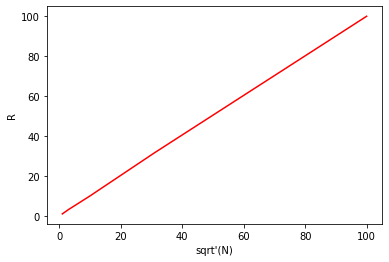

In [100]:
fig = plt.figure()
op = []

ks = []
dists = []

x_ = []; y_ = []
x = 0.; y= 0.
R2k = 0.; R2 = 0.
for m in range(5):
    N = 10**m
    K = int(N**0.5)
    ks.append(K)
    R2 = 0.
    for k in range(K):
        random.seed(k)
        R2k = 0.
        for i in range(N):
            x_.append(x); y_.append(y)
            dx = (random.random() - 0.5)*2; dy = (random.random() - 0.5)*2
            l = (dx**2 + dy**2)**(0.5)
            dx /= l; dy /= l
            x +=  dx; y += dy
            
            R2k += dx**2 + dy**2
            
        R2 += R2k
        
    R2 /= K
    
    dists.append(R2**0.5)
    print(R2**0.5)
    
fig  = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel("sqrt'(N)")
ax.set_ylabel("R")
_ = plt.plot(ks,dists,color="r")    


### 放射線崩壊
指数分布の再現
$N = c e^{-\lambda t}$となっているか？

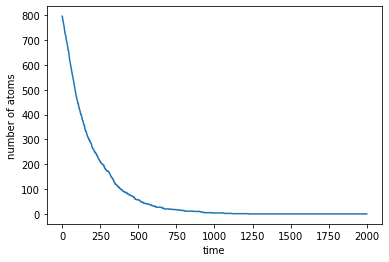

In [124]:
lambda1 = 0.005
max = 800; time_max = 2000; seed  = 68111
number = nloop = max
atoms = []
for t in range(time_max + 1):
#     print(f"time{t}")
    for atom in range(1, number + 1):
        decay = random.random()
        if (decay < lambda1):
            nloop -= 1
#             print(f"atom{atom}崩壊")
        number = nloop
    atoms.append(number)
#     time.sleep(0.5)

fig, ax = plt.subplots()
ax.set_xlabel("time")
ax.set_ylabel("number of atoms")
_ = ax.plot(atoms)